In [ ]:
!nvcc --version

In [ ]:
!pip install easyocr
!pip install imutils
!pip install opencv-python-headless==4.1.2.30
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

**Convert Colored Image into Grayscale format**

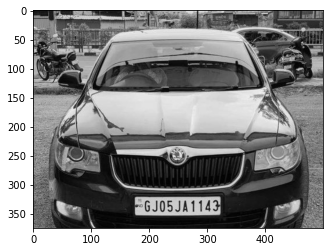

In [62]:
img =cv2.imread('/content/6.jpeg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

**Apply Filter and Edge Detection**

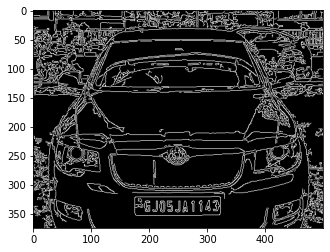

In [63]:
bfilter=cv2.bilateralFilter(gray,11,17,17) #Noise reduction
edged=cv2.Canny(bfilter,30,200)  #Edge detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

**Find contours and Apply Mask**

In [64]:
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:10]

In [65]:
location=None
for contour in contours:
  approx=cv2.approxPolyDP(contour,10,True)
  if len(approx)==4:
    location=approx
    break

In [66]:
location

array([[[323, 322]],

       [[176, 321]],

       [[175, 349]],

       [[321, 352]]], dtype=int32)

In [67]:
mask=np.zeros(gray.shape,np.uint8)
new_image=cv2.drawContours(mask,[location],0,255,-1)
new_image=cv2.bitwise_and(img,img,mask=mask)

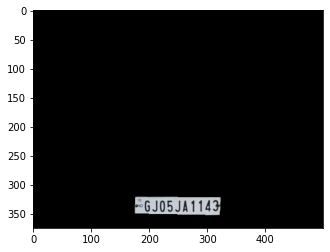

In [68]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [69]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped_image=gray[x1:x2+1,y1:y2+1]

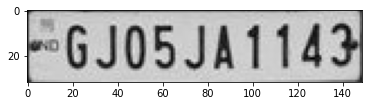

In [70]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

**Use Easy OCR To Read Text**

In [71]:
reader=easyocr.Reader(['en'])
result=reader.readtext(cropped_image)
result

[([[14, 2], [149, 2], [149, 32], [14, 32]], '6J05Ja1143', 0.8294574776737849)]

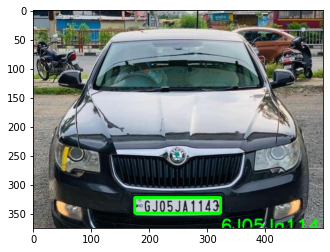

In [72]:
text=result[0][-2]
font=cv2.FONT_HERSHEY_SIMPLEX
res=cv2.putText(img,text=text,org=(approx[0][0][0],approx[1][0][1]+60),fontFace=font,fontScale=1,color=(0,255,0),thickness=2,lineType=cv2.LINE_AA,bottomLeftOrigin=False)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))